# Exploratory Data Analysis (EDA) on MovieLens 100k Dataset

This notebook performs an EDA on the MovieLens 100k dataset, focusing on user-item interactions. The goal is to understand the data characteristics before building a recommendation system.

Dataset files are located in the `ml-100k/` directory.

**EDA Steps:**
1. Load Data
2. Initial Data Inspection
3. Ratings Analysis
4. User Analysis
5. Movie Analysis
6. User-Item Interaction Deeper Dive
7. Visualizations
8. Summary of Findings

## 1. Load Data

We will load the following files:
- `u.data`: Contains user ratings for movies.
- `u.user`: Contains user demographic information.
- `u.item`: Contains movie information.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [ ]:
DATA_DIR = "ml-100k/"
UDATA_PATH = DATA_DIR + "u.data"
UUSER_PATH = DATA_DIR + "u.user"
UITEM_PATH = DATA_DIR + "u.item"

ratings_cols = ['user_id', 'item_id', 'rating', 'timestamp']
ratings_df = pd.read_csv(UDATA_PATH, sep='\t', names=ratings_cols, encoding='latin-1')

user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users_df = pd.read_csv(UUSER_PATH, sep='|', names=user_cols, encoding='latin-1')
items_df = pd.read_csv(UITEM_PATH, sep='|', names=item_cols, encoding='latin-1')

print("Data loaded successfully.")

Data loaded successfully.


In [32]:
items_df.columns 

Index(['item_id', 'title', 'release_date', 'video_release_date', 'imdb_url',
       'unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'release_year'],
      dtype='object')

In [ ]:
item_cols = ['item_id', 'title', 'release_date', 'video_release_date',
             'imdb_url', 'unknown', 'Action', 'Adventure', 'Animation',
             'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
             'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
             'Thriller', 'War', 'Western']

## 2. Initial Data Inspection

In [19]:
print("Ratings Data (u.data):")
print(ratings_df.head())
print("\nShape:", ratings_df.shape)
print("\nInfo:")
ratings_df.info()
print("\nMissing values:\n", ratings_df.isnull().sum())
print("\nDescriptive statistics:\n", ratings_df.describe(include='all'))

Ratings Data (u.data):
   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

Shape: (100000, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB

Missing values:
 user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

Descriptive statistics:
             user_id        item_id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     33

In [20]:

print("Users Data (u.user):")
print(users_df.head())
print("\nShape:", users_df.shape)
print("\nInfo:")
print(users_df.info())
print("\nMissing values:\n", users_df.isnull().sum())
print("\nDescriptive statistics:\n", users_df.describe(include='all'))

Users Data (u.user):
   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

Shape: (943, 5)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None

Missing values:
 user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

Descriptive statistics:
            user_id         age gender occupation zip_code
count   943.000000  943.000000    943        943      94

In [21]:

print("Items Data (u.item):")
items_df.head()



Items Data (u.item):


,item_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995.0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0


In [22]:
print("\nInfo:")
items_df.info()



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_id             1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16 

In [23]:
print("\nMissing values:\n", items_df.isnull().sum())

print("\nDescriptive statistics (object columns might be more informative with value_counts):\n", items_df.describe(include='all')) 


Missing values:
 item_id                  0
title                    0
release_date             1
video_release_date    1682
imdb_url                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
release_year             1
dtype: int64

Descriptive statistics (object columns might be more informative with value_counts):
             item_id                  title release_date  video_release_date  \
count   1682.000000                   1682         1681                 0.0   
unique          NaN                   1664       

In [24]:
print("\nMissing values in items_df['release_date']:", items_df['release_date'].isnull().sum())
print("Missing values in items_df['video_release_date']:", items_df['video_release_date'].isnull().sum())
print("Missing values in items_df['imdb_url']:", items_df['imdb_url'].isnull().sum())


Missing values in items_df['release_date']: 1
Missing values in items_df['video_release_date']: 1682
Missing values in items_df['imdb_url']: 3


## 3. Ratings Analysis

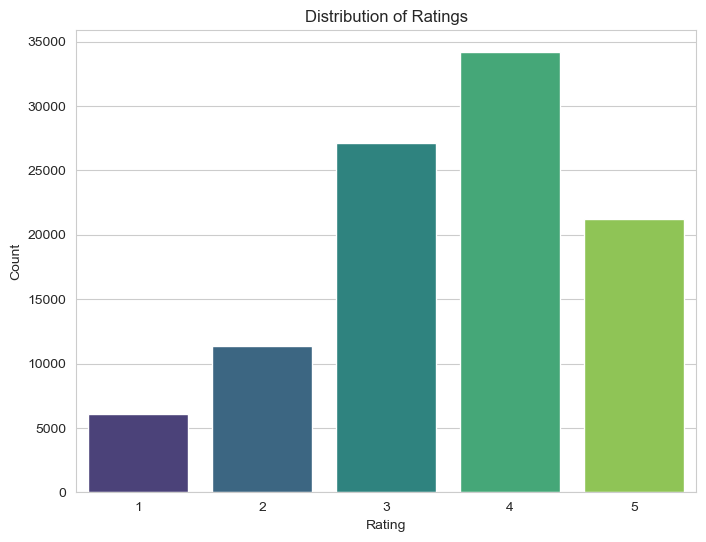


Descriptive statistics of ratings:
 count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


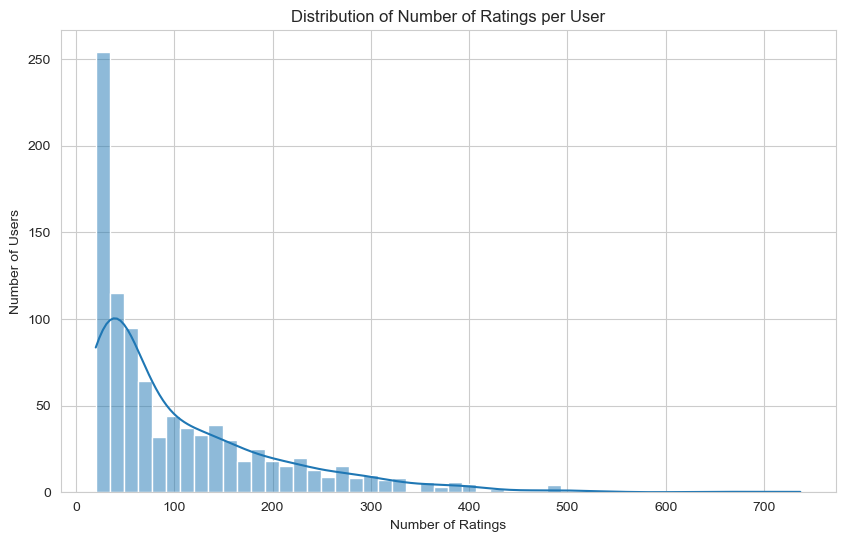


Descriptive statistics of ratings per user:
 count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: rating, dtype: float64


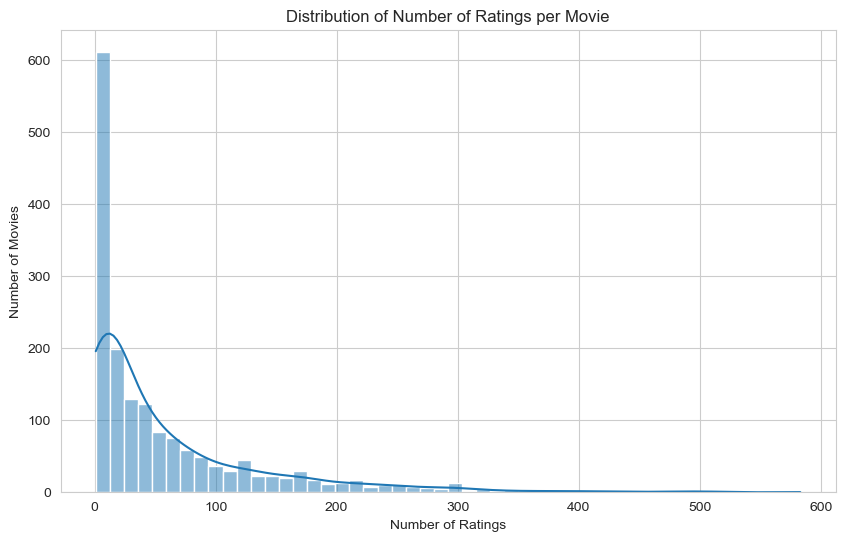


Descriptive statistics of ratings per movie:
 count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
Name: rating, dtype: float64


In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ratings_df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

print("\nDescriptive statistics of ratings:\n", ratings_df['rating'].describe())

# ratings per user
ratings_per_user = ratings_df.groupby('user_id')['rating'].count()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=50, kde=True)
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()
print("\nDescriptive statistics of ratings per user:\n", ratings_per_user.describe())

# ratings per movie
ratings_per_movie = ratings_df.groupby('item_id')['rating'].count()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_movie, bins=50, kde=True)
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()
print("\nDescriptive statistics of ratings per movie:\n", ratings_per_movie.describe())

There are some movies with very few ratings and alos some users with very few rated movies. attending to these may become crucial when modeling.

## 4. User Analysis

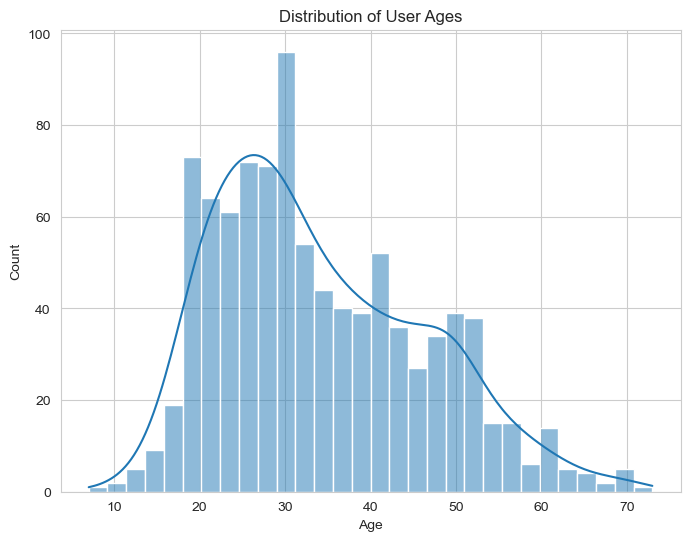

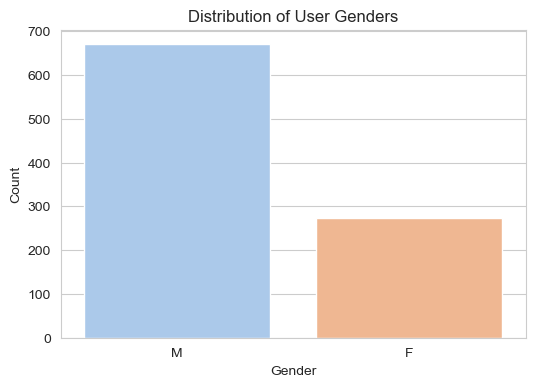

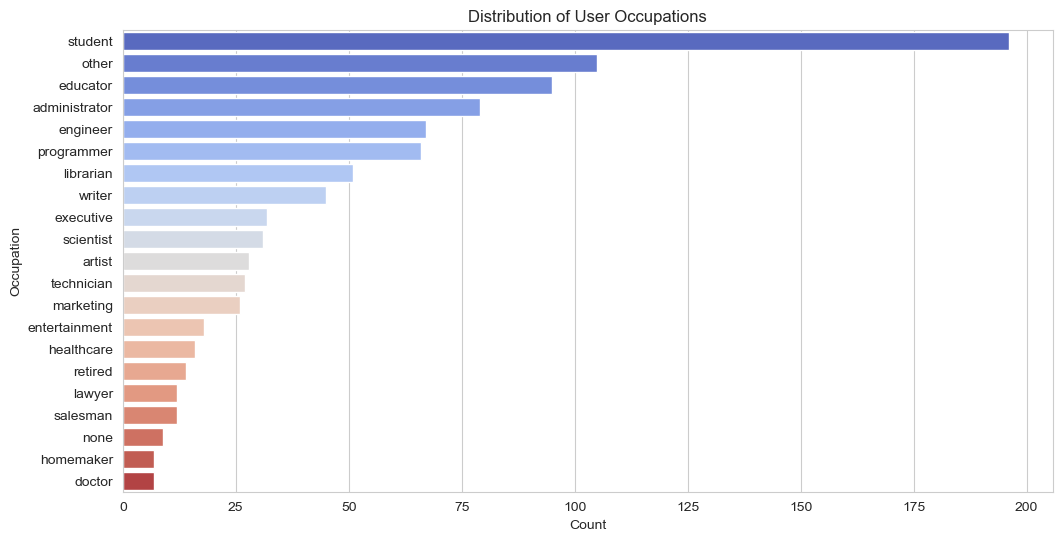

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(users_df['age'], bins=30, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=users_df, palette='pastel')
plt.title('Distribution of User Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='occupation', data=users_df, order = users_df['occupation'].value_counts().index, palette='coolwarm')
plt.title('Distribution of User Occupations')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

## 5. Movie Analysis

In [31]:
items_df.columns

Index(['item_id', 'title', 'release_date', 'video_release_date', 'imdb_url',
       'unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'release_year'],
      dtype='object')

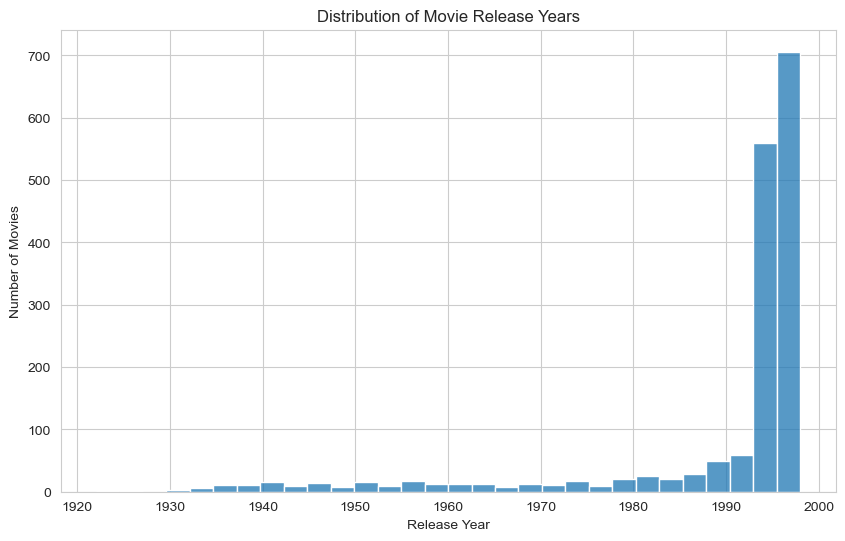

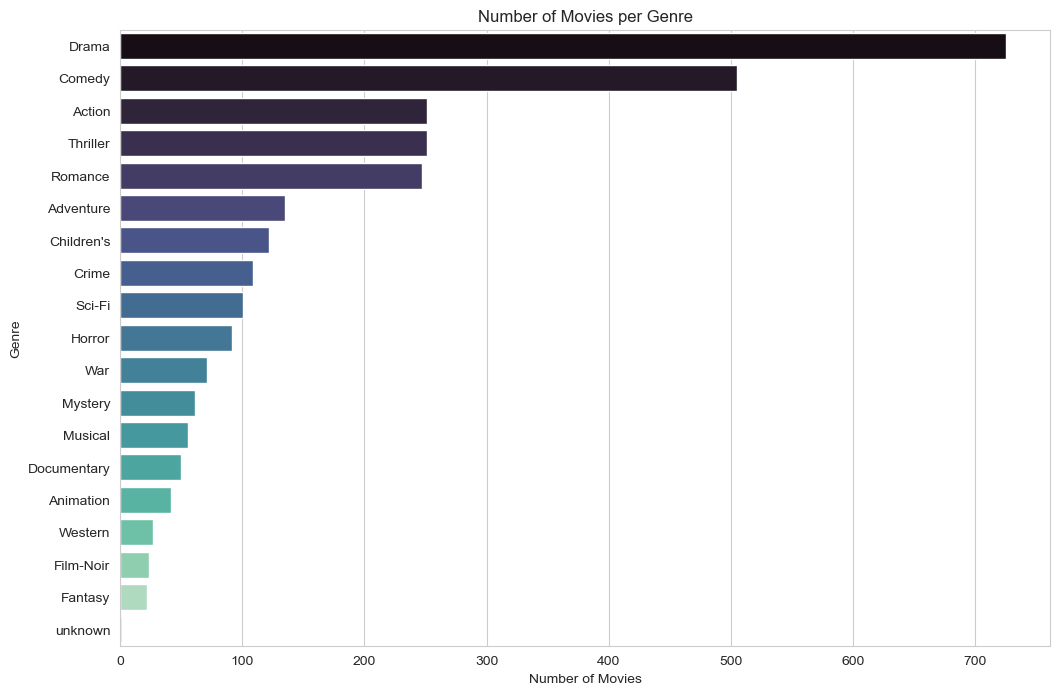

In [27]:
#  release_date to datetime objects
items_df['release_year'] = pd.to_datetime(items_df['release_date'], errors='coerce').dt.year

plt.figure(figsize=(10, 6))
sns.histplot(items_df['release_year'].dropna(), bins=30, kde=False)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

# Genre
genre_cols = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 
              'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
genre_counts = items_df[genre_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='mako')
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

## 6. User-Item Interactions

Number of users: 943
Number of items: 1682
Number of ratings: 100000
Sparsity of the user-item matrix: 0.9370


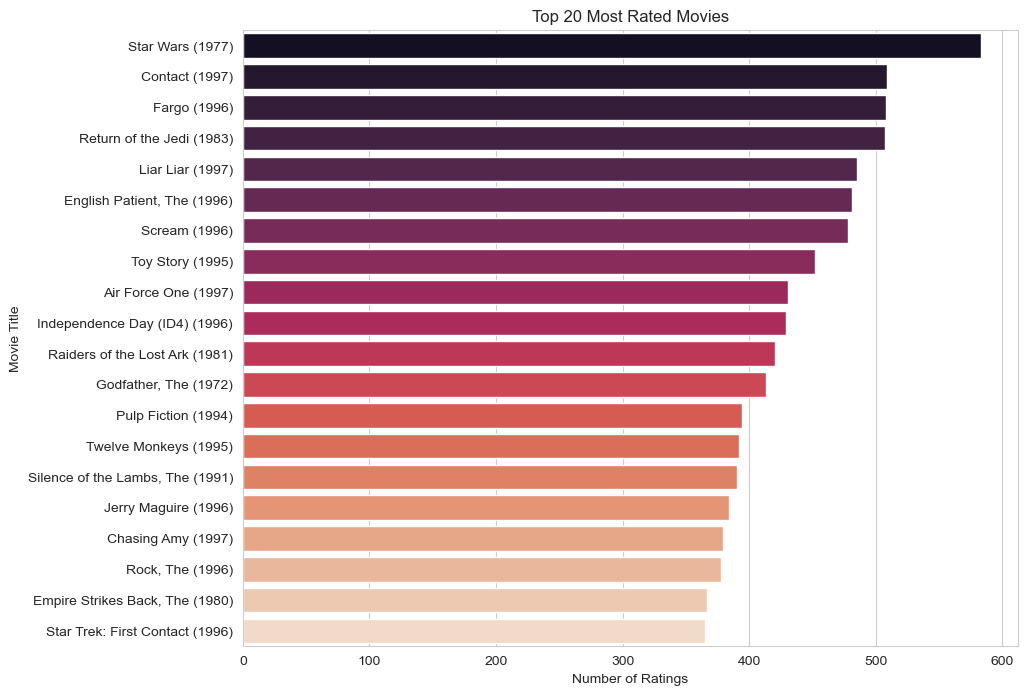

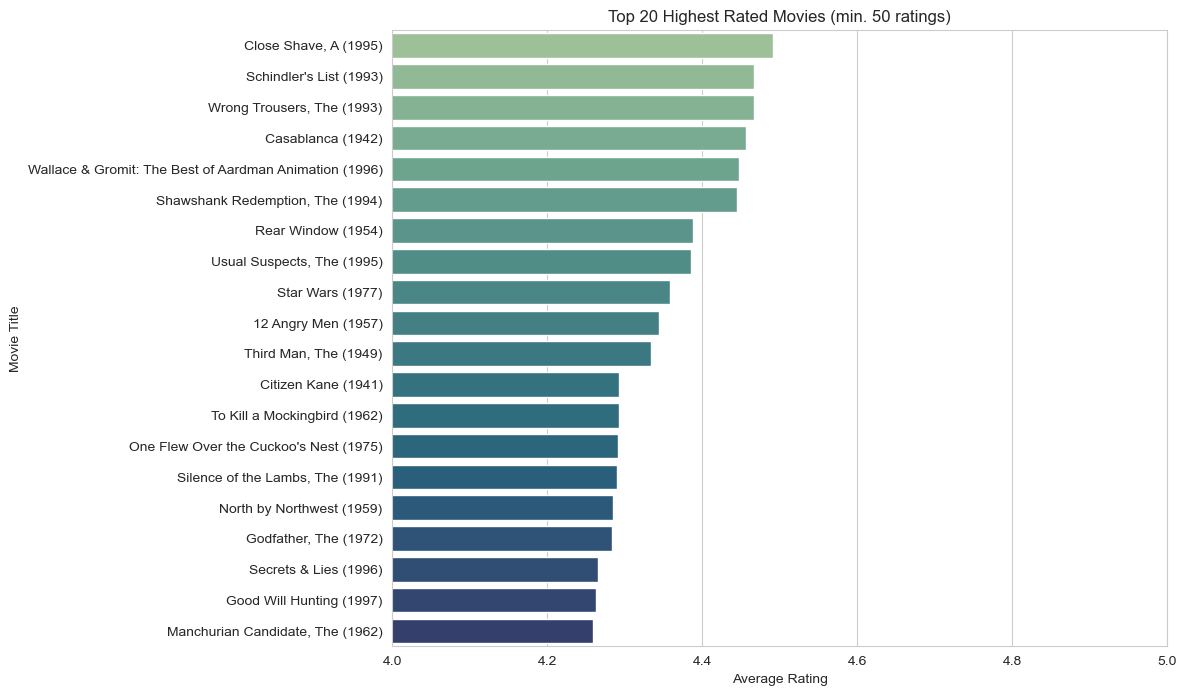

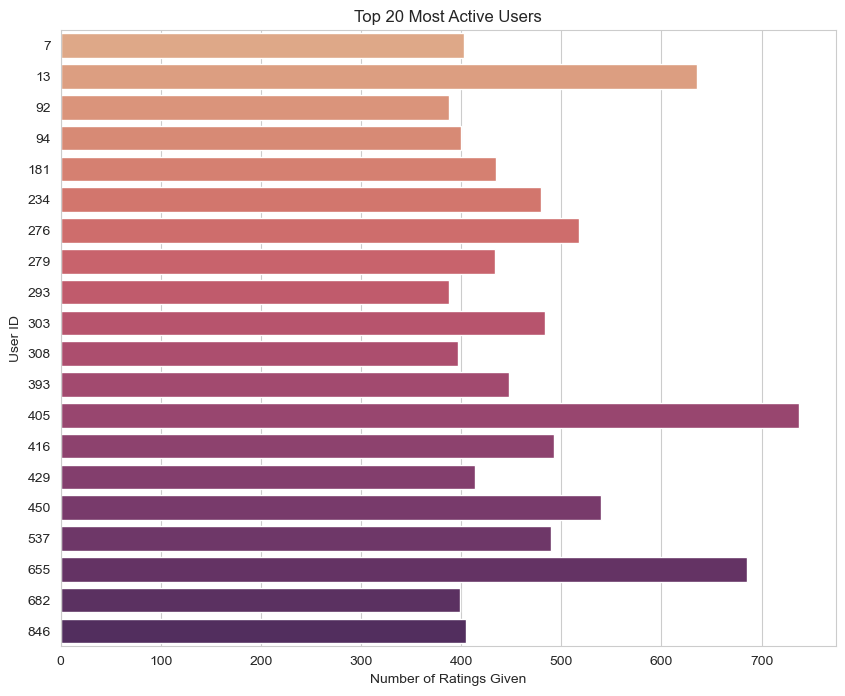

In [28]:
# merged ratings with movie titles
merged_df = pd.merge(ratings_df, items_df, on='item_id')

# Sparsity
num_users = ratings_df['user_id'].nunique()
num_items = ratings_df['item_id'].nunique()
num_ratings = len(ratings_df)
sparsity = 1 - (num_ratings / (num_users * num_items))
print(f"Number of users: {num_users}")
print(f"Number of items: {num_items}")
print(f"Number of ratings: {num_ratings}")
print(f"Sparsity of the user-item matrix: {sparsity:.4f}")

# most popular movies (most rated)
top_20_popular_movies = merged_df.groupby('title')['rating'].count().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_20_popular_movies.values, y=top_20_popular_movies.index, palette='rocket')
plt.title('Top 20 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

# highest rated movies (min 50 ratings)
movie_ratings_avg = merged_df.groupby('title')['rating'].mean()
movie_ratings_count = merged_df.groupby('title')['rating'].count()
ratings_summary = pd.DataFrame({'average_rating': movie_ratings_avg, 'num_ratings': movie_ratings_count})
top_20_highest_rated = ratings_summary[ratings_summary['num_ratings'] >= 50].sort_values('average_rating', ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_20_highest_rated['average_rating'], y=top_20_highest_rated.index, palette='crest')
plt.title('Top 20 Highest Rated Movies (min. 50 ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.xlim(4, 5) # Most high ratings are above 4
plt.show()

# most active users (users who rated most movies)
top_20_active_users = ratings_df['user_id'].value_counts().head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_20_active_users.values, y=top_20_active_users.index, palette='flare', orient='h')
plt.title('Top 20 Most Active Users')
plt.xlabel('Number of Ratings Given')
plt.ylabel('User ID')
plt.show()

## 7. Some more Visualizations

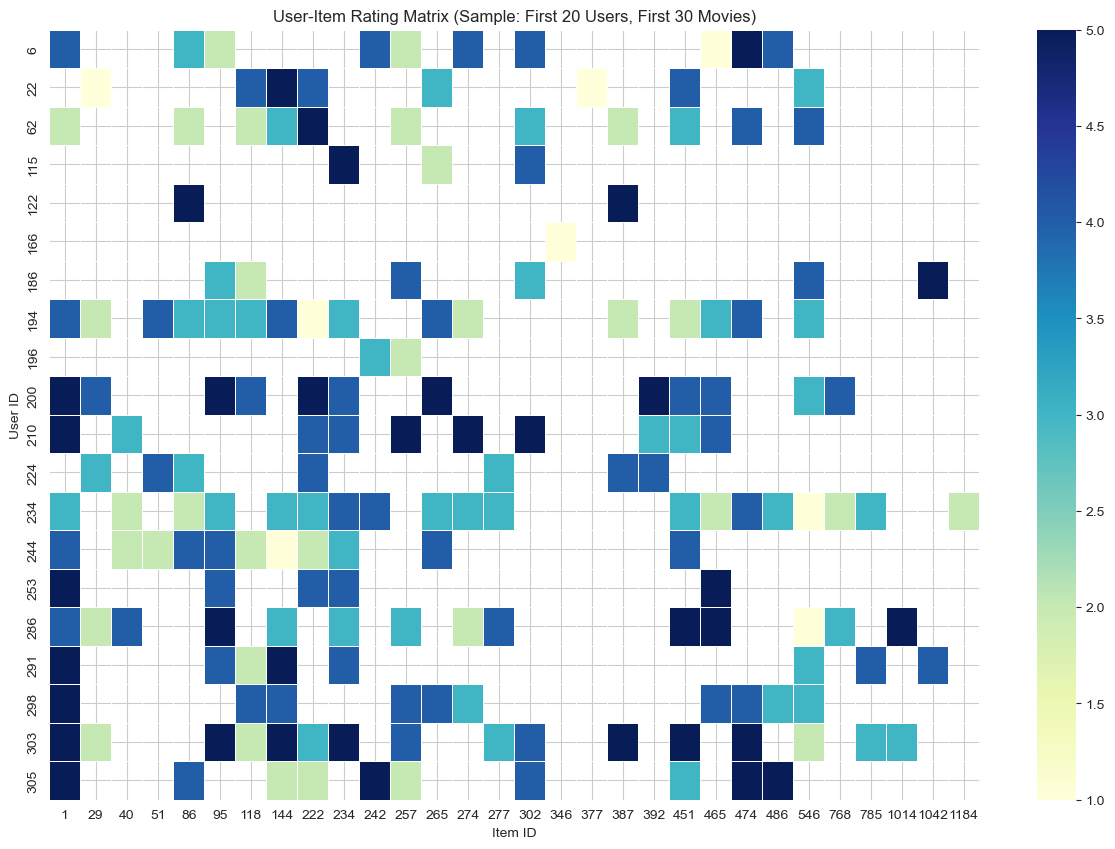

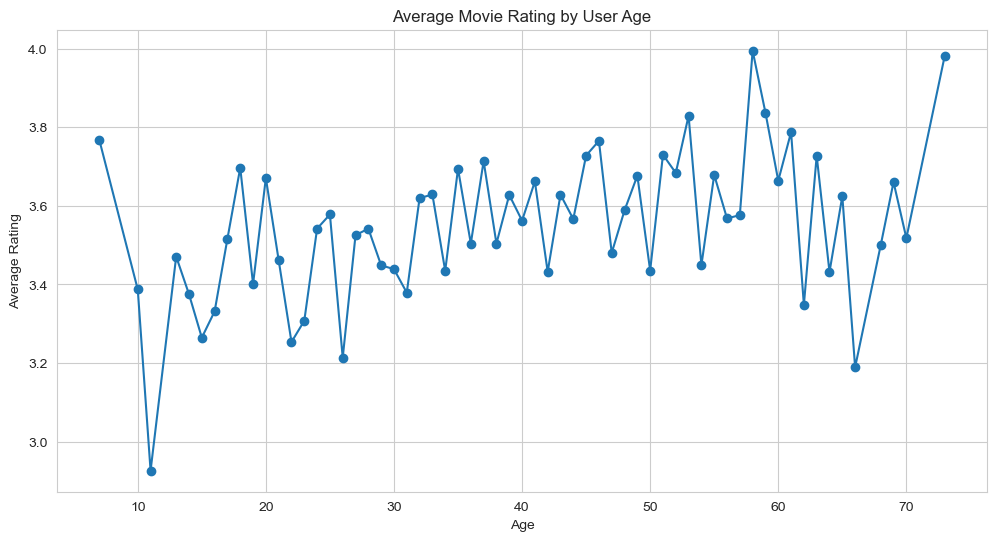

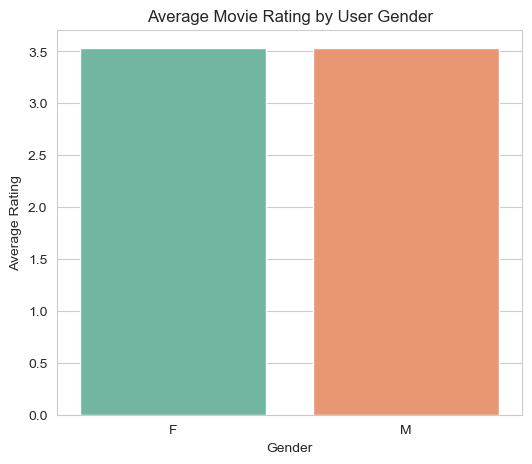

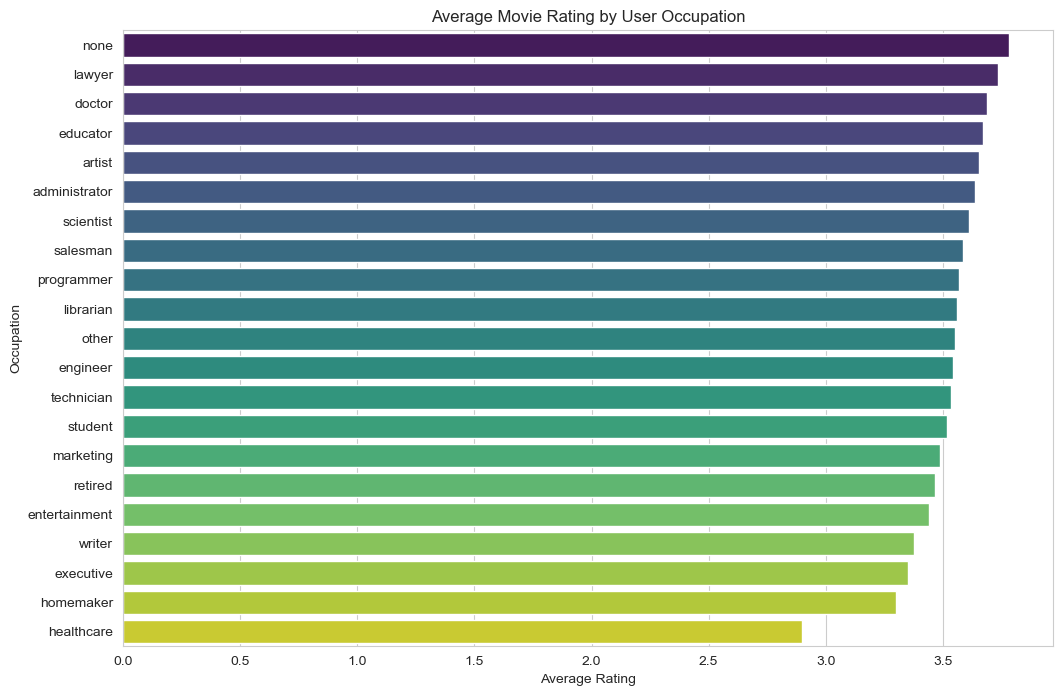

In [29]:
# User-Item Matrix Heatmap (sample for visualization purposes)
# Creating a pivot table for a small sample of users and movies due to size
sample_user_ids = ratings_df['user_id'].unique()[:20] # First 20 users
sample_item_ids = ratings_df['item_id'].unique()[:30] # First 30 movies

ratings_sample_df = ratings_df[ratings_df['user_id'].isin(sample_user_ids) & ratings_df['item_id'].isin(sample_item_ids)]
user_item_matrix_sample = ratings_sample_df.pivot_table(index='user_id', columns='item_id', values='rating')

plt.figure(figsize=(15, 10))
sns.heatmap(user_item_matrix_sample, annot=False, cmap='YlGnBu', fmt='.1g', linewidths=.5)
plt.title('User-Item Rating Matrix (Sample: First 20 Users, First 30 Movies)')
plt.xlabel('Item ID')
plt.ylabel('User ID')
plt.show()

# Average rating by user age
user_ratings_merged = pd.merge(users_df, ratings_df, on='user_id')
avg_rating_by_age = user_ratings_merged.groupby('age')['rating'].mean()

plt.figure(figsize=(12, 6))
avg_rating_by_age.plot(kind='line', marker='o')
plt.title('Average Movie Rating by User Age')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

# avg rating by user gender
avg_rating_by_gender = user_ratings_merged.groupby('gender')['rating'].mean()

plt.figure(figsize=(6, 5))
sns.barplot(x=avg_rating_by_gender.index, y=avg_rating_by_gender.values, palette='Set2')
plt.title('Average Movie Rating by User Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.show()

# avg rating by user occupation
avg_rating_by_occupation = user_ratings_merged.groupby('occupation')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating_by_occupation.values, y=avg_rating_by_occupation.index, palette='viridis')
plt.title('Average Movie Rating by User Occupation')
plt.xlabel('Average Rating')
plt.ylabel('Occupation')
plt.show()

## 8. Summary of Findings

**Summary of EDA Findings:**

- The dataset contains 943 users, 1682 movies, and 100000 ratings. Which resutls in a very sparse graph!
- Ratings range from 1 to 5, with 4 being the most common rating.
- User ages are diverse, with a peak in the 20s and 30s. there are some unrealistic ages ( < 10) in the data, which might be a recording error.
- There are more male users than female users. More than twice the amount approximately.
- 'Student', 'other', and 'educator' are among the most common occupations.
- Most movies in the dataset were released in the 1990s adn 2000s. 
- 'Drama' and 'Comedy' are the most prevalent (rated) genres.
- The user-item interaction matrix is sparse (sparsity: 0.9370). Which makes the recommendation perocess very challenging.
- Certain movies like 'Star Wars (1977)' are significantly more rated than others. 
- Some users are much more active in rating movies than others. Probably doing it more professionaly.
- Average ratings show some variation across different age groups, genders, and occupations.

This EDA provides a deeper look into the MovieLens 100k dataset, highlighting key characteristics of users, items, and their interactions. These insights can inform the design and evaluation of the RecSys.